Missing values:
Date              0
Instagram_Time    0
Weather           0



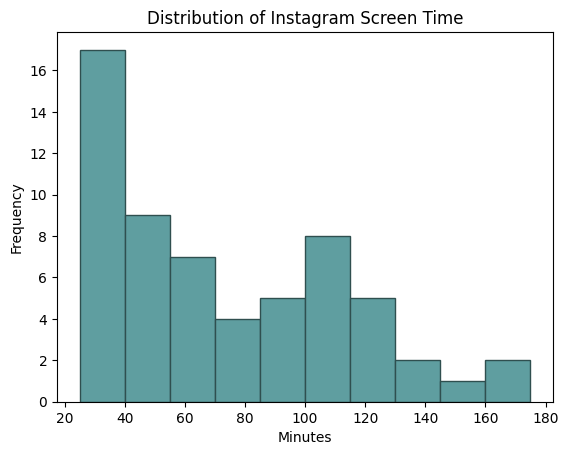

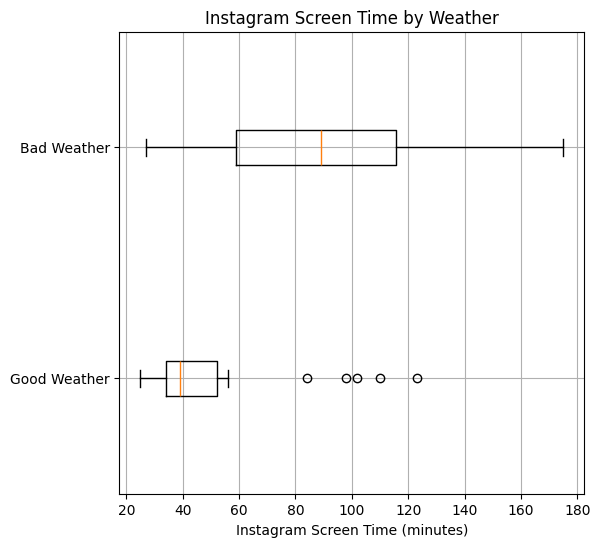

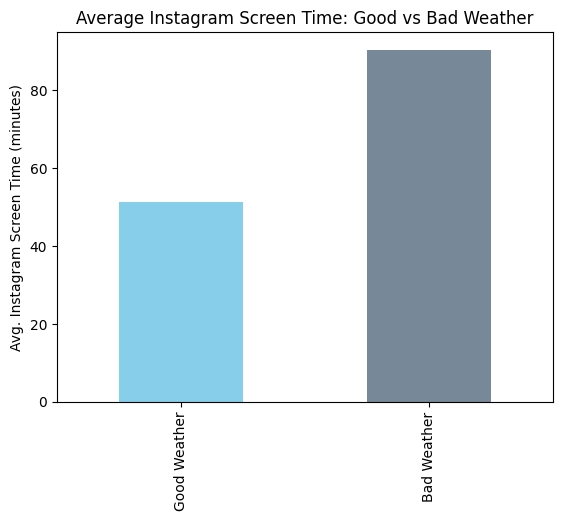


Intercept (β₀): 51.40
Slope (β₁): 39.06



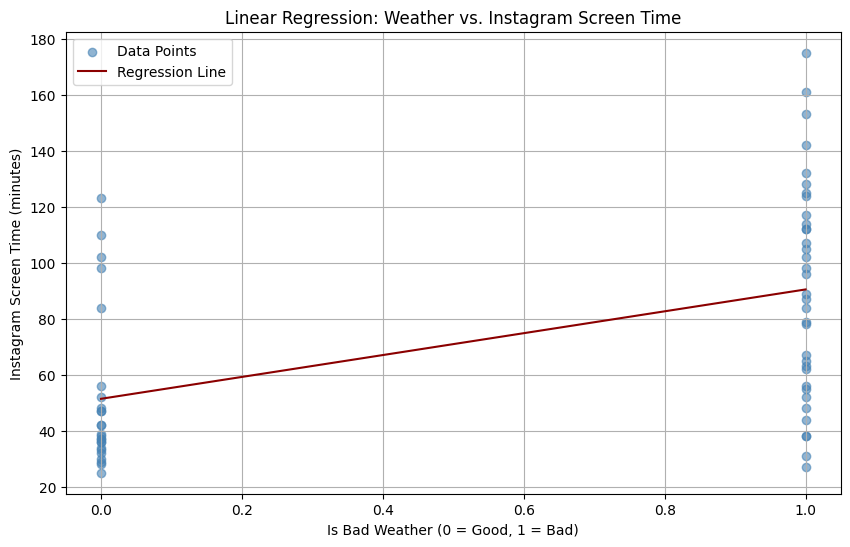


Pearson Correlation Coefficient: 0.49
P-Value: 0.0001
The p-value is less than 0.05. We reject the null hypothesis.
There is a statistically significant relationship between bad weather and my Instagram screen time.

T-statistic: 4.52
P-value: 3.1e-05
We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.

Average Instagram usage for both weather groups:
Bad Weather Days Average: ~ 90.46 minutes
Good Weather Days Average: ~ 51.4 minutes


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr


# Reading data
df = pd.read_excel("dsa_data.xlsx")

# Naming columns
df.columns = ['Date', 'Instagram_Time', 'Weather']

# Data cleaning
df['Date'] = pd.to_datetime(df['Date'])

print("Missing values:")
print(df.isnull().sum().to_string())
print()

df = df.dropna(subset=['Instagram_Time'])

# Labeling bad weather
bad_weather = ['R', 'C', 'SNOWY', 'FOGGY']
df['IsBadWeather'] = df['Weather'].isin(bad_weather)

# Visualization: Histogram
plt.hist(df['Instagram_Time'], bins=10, color='cadetblue', edgecolor='darkslategrey')
plt.title("Distribution of Instagram Screen Time")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()
print()

# Defining groups for boxplot
bad = df[df['IsBadWeather'] == True]['Instagram_Time']
good = df[df['IsBadWeather'] == False]['Instagram_Time']

# Visualization: Boxplot
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot([good, bad],
           vert=False,
           tick_labels=['Good Weather', 'Bad Weather'])
ax.set_xlabel("Instagram Screen Time (minutes)")
ax.set_title("Instagram Screen Time by Weather")
ax.grid(True)
plt.show()
print()

# Visualization: Bar chart
means = df.groupby('IsBadWeather')['Instagram_Time'].mean()
means.index = ['Good Weather', 'Bad Weather']
means.plot(kind='bar', color=['skyblue', 'lightslategrey'])
plt.title('Average Instagram Screen Time: Good vs Bad Weather')
plt.ylabel('Avg. Instagram Screen Time (minutes)')
plt.show()
print()

# Linear Regression
X = df['IsBadWeather'].values.reshape(-1, 1)
y = df['Instagram_Time'].values

model = LinearRegression()
model.fit(X, y)

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")
print()

# Regression Line Plot
x_vals = np.array([0, 1]).reshape(-1, 1)  # for 0 and 1 (good and bad weather)
y_preds = model.predict(x_vals)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='steelblue', label='Data Points')
plt.plot(x_vals, y_preds, color='darkred', label='Regression Line')
plt.title("Linear Regression: Weather vs. Instagram Screen Time")
plt.xlabel("Is Bad Weather (0 = Good, 1 = Bad)")
plt.ylabel("Instagram Screen Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_coefficient, p_value = pearsonr(df['IsBadWeather'].astype(int), df['Instagram_Time'])

print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
    print("There is a statistically significant relationship between bad weather and my Instagram screen time.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")
    print("There is no statistically significant relationship between bad weather and my nstagram screen time.")

# Hypothesis testing
# Null hypothesis (H0): There is no significant difference in Instagram screen time between bad and good weather days.
# Alternative hypothesis (H1): Instagram screen time is significantly higher during bad weather days.
bad = df[df['IsBadWeather'] == True]['Instagram_Time']
good = df[df['IsBadWeather'] == False]['Instagram_Time']

# Independent t-test
t_stat, p_val = ttest_ind(bad, good, equal_var=False)
print("\nT-statistic:", round(t_stat, 2))
print("P-value:", round(p_val, 6))

# Interpreting the result
if p_val < 0.05:
    print("We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.")
else:
    print("We fail to reject Null Hypothesis. There is no significant difference in Instagram screen time between bad and good weather days.")

# Average Instagram usage for both weather groups
print("\nAverage Instagram usage for both weather groups:")
print("Bad Weather Days Average: ~", round(bad.mean(), 2),"minutes")
print("Good Weather Days Average: ~", round(good.mean(), 2),"minutes")

